# Sigma Meanshift

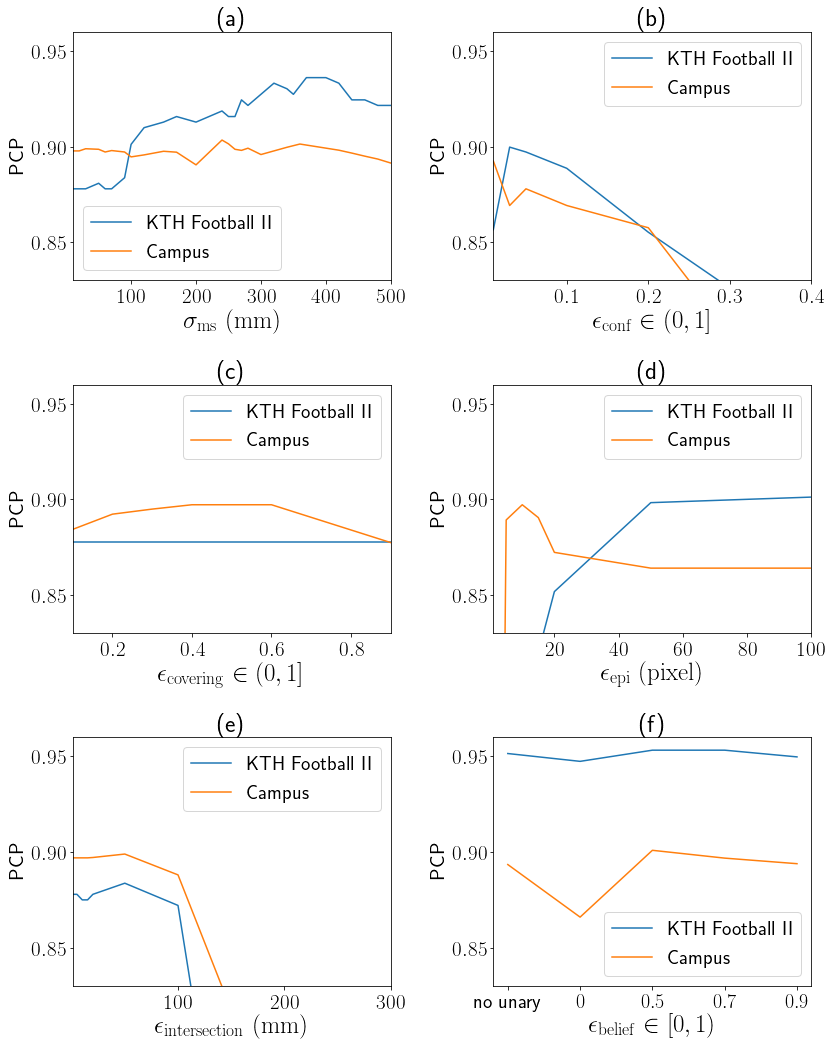

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)

import matplotlib

matplotlib.rcParams.update({'font.size': 21})


label_campus = "Campus"
label_kth = "KTH Football II"
FS_XLABEL = 25
FS_TITLE = 25
FS_LEGEND = 20

ylim = [0.83, 0.96]

H = 2
W = 3
fig = plt.figure(figsize=(12,15))
# ==========================================================
# RADIUS
# ==========================================================
ms_radius_kth = [
    10,   20,  30,  50,  60,  70,  90, 100, 
    120, 150, 170, 200, 240, 250, 260, 270, 
    280, 300] + [320, 340, 350, 370, 400] +\
    [420, 440, 460, 480, 500]
ms_radius_results_kth = [
    0.877906976744186, 0.877906976744186, 
    0.877906976744186, 0.8808139534883721, 
    0.877906976744186, 0.877906976744186, 
    0.8837209302325582, 0.9011627906976745, 
    0.9098837209302325, 0.9127906976744186, 
    0.9156976744186046, 0.9127906976744186, 
    0.9186046511627907, 0.9156976744186046, 
    0.9156976744186046, 0.9244186046511628, 
    0.9215116279069767, 0.9273255813953488] + [
    0.9331395348837209, 0.9302325581395349, 
    0.9273255813953488, 0.936046511627907, 
    0.936046511627907] + [
    0.9331395348837209, 0.9244186046511628, 
    0.9244186046511628, 0.9215116279069767, 
    0.9215116279069767
]
# ==========================================
ms_radius_campus = [10, 20, 30, 50, 60, 70, 90, 100, 120, 150, 170, 200, 240]+\
    [250, 260, 270, 280, 300, 340, 360, 420, 440, 460, 480, 500]
ms_radius_results_up_till_250 = [
    0.8977272727272727, 0.8977272727272727, 0.8988636363636363, 
    0.8985795454545454, 0.897159090909091, 0.8979166666666666, 
    0.897159090909091, 0.8946022727272728, 0.8956439393939393, 
    0.8975378787878787, 0.8970643939393939, 0.890435606060606, 
    0.9034090909090909]
ms_radius_results_from_250_till_300 = [
    0.9014204545454545, 0.8985795454545454, 
    0.8980113636363637, 0.8991477272727273, 0.8958333333333333
]
ms_radius_results_campus = ms_radius_results_up_till_250 +\
    ms_radius_results_from_250_till_300 + [
    0.8996212121212122, 0.9013257575757576,
    0.8981060606060607, 0.8965909090909091,
    0.8949810606060606, 0.8934659090909091,
    0.8913825757575757
]

# -------------------------------------------

ax = fig.add_subplot(W, H, 1)
ax.set_title('(a)', fontsize=FS_TITLE)
ax.set_xlim([10, 500])
#ax.set_ylim([0, 1.01])
ax.set_ylim(ylim)
ax.plot(ms_radius_kth, ms_radius_results_kth, label=label_kth)
ax.plot(ms_radius_campus, ms_radius_results_campus, 
        label=label_campus)
ax.set_xlabel(r'$\sigma_{\mathrm{ms}} \ \mathrm{(mm)}$', fontsize=FS_XLABEL)
ax.set_ylabel('PCP')
plt.legend(fontsize=FS_LEGEND)

# ==========================================================
# DETECTION THRESHOLD
# ==========================================================

ax = fig.add_subplot(W, H, 2)
ax.set_title('(b)', fontsize=FS_TITLE)
ax.set_xlabel(r'$\epsilon_{\mathrm{conf}} \in (0, 1]$', fontsize=FS_XLABEL)
ax.set_ylabel('PCP')
ax.set_xlim([0.01, 0.4])
ax.set_ylim(ylim)

hm_detection_thresholds = [0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4]
ms_radius_results = [0.8924418604651163, 0.8691860465116279, 0.877906976744186, 0.8691860465116279, 0.8575581395348837, 0.8023255813953488, 0.7093023255813954]

ax.plot(hm_detection_thresholds, hm_detection_thresholds_r,
       label=label_kth)

# --------------
hm_detection_thresholds = [0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4]
hm_detection_thresholds_r = [0.8565340909090909, 0.899715909090909, 
                           0.897159090909091, 0.8886363636363637, 
                           0.8552083333333333, 0.8259469696969696, 
                           0.7928977272727272]
ax.plot(hm_detection_thresholds, ms_radius_results,
       label=label_campus)
plt.legend(fontsize=FS_LEGEND)

# ==========================================================
# CONFLICT
# ==========================================================
ax = fig.add_subplot(W, H,3)
ax.set_title('(c)', fontsize=FS_TITLE)
ax.set_xlabel(r'$\epsilon_{\mathrm{covering}} \in (0, 1]$', fontsize=FS_XLABEL)
ax.set_ylabel('PCP')
ax.set_xlim([0.1, 0.9])
ax.set_ylim(ylim)

pp_conflict_overlap = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9]

pp_conflict_overlap_r = [0.877906976744186, 0.877906976744186, 0.877906976744186, 0.877906976744186, 0.877906976744186, 0.877906976744186, 0.877906976744186]
ax.plot(pp_conflict_overlap,pp_conflict_overlap_r, label=label_kth)

pp_conflict_overlap_r = [0.884280303030303, 0.8922348484848485, 0.8948863636363636, 0.897159090909091, 0.897159090909091, 0.897159090909091, 0.8773674242424242]
ax.plot(pp_conflict_overlap,pp_conflict_overlap_r, label=label_campus)

plt.legend(fontsize=FS_LEGEND)

# ==========================================================
# EPI DISTANCE
# ==========================================================
ax = fig.add_subplot(W, H,4)
ax.set_title('(d)', fontsize=FS_TITLE)
ax.set_xlabel(r'$\epsilon_{\mathrm{epi}} \ \mathrm{(pixel)}$', fontsize=FS_XLABEL)
ax.set_ylabel('PCP')
ax.set_xlim([1, 100])
ax.set_ylim(ylim)

max_epi_distance = [1, 5, 10, 15, 20, 50, 100]

epidistance_r =  [0.0029069767441860465, 0.3691860465116279,
                 0.752906976744186, 0.8197674418604651, 
                 0.8517441860465116, 0.8982558139534884, 
                 .9011627906976745]
ax.plot(max_epi_distance, epidistance_r, label=label_kth)

epidistance_r =  [0.21704545454545454, 0.8892045454545454, 
                  0.897159090909091, 0.890435606060606, 
                  0.8722537878787879, 0.8640151515151514, 
                  0.8640151515151514]
ax.plot(max_epi_distance, epidistance_r, label=label_campus)
plt.legend(fontsize=FS_LEGEND)


# ==========================================================
# MIN JOINT DISTANCE
# ==========================================================
ax = fig.add_subplot(W, H,5)
ax.set_title('(e)', fontsize=FS_TITLE)
ax.set_xlabel(r'$\epsilon_{\mathrm{intersection}} \ \mathrm{(mm)}$', fontsize=FS_XLABEL)
ax.set_ylabel('PCP')
ax.set_xlim([1, 300])
ax.set_ylim(ylim)

min_joint_distance = [1, 5, 
                      10, 15, 
                      20, 50, 
                      100, 150, 
                      200, 300]
# , 150, 200, 500
min_joint_distance_results = [0.877906976744186, 0.877906976744186,
                              0.875, 0.875, 
                              0.877906976744186, 0.8837209302325582,
                              0.872093023255814, 0.6976744186046512, 
                              0, 0.0]
ax.plot(min_joint_distance, min_joint_distance_results, label=label_kth)


min_joint_distance_results = [0.8969696969696969, 0.8969696969696969, 
                              0.8969696969696969, 0.8969696969696969, 
                              0.897159090909091, 0.8989583333333332, 
                              0.8880681818181818, 0.8174242424242424, 
                              0.34867424242424244, 0.0]

ax.plot(min_joint_distance, min_joint_distance_results, label=label_campus)
plt.legend(fontsize=FS_LEGEND)


# Unary influence
ax = fig.add_subplot(W, H, 6)
ax.set_title('(f)', fontsize=FS_TITLE)

PCP_campus = [
    0.8934779585593103,  # no unary
    0.8659848247809762,  # vanilla, e=0.0
    0.9009167275066056,  # vanilla, e=0.5
    0.8968317601863439,  # vanilla, e=0.7
    0.8939212209706578   # vanilla, e=0.9
]


PCP_kth = [
    0.951518691588785,  # no unary
    0.9474299065420562, # vanilla e=0.0
    0.9532710280373832,  # vanilla e=0.5
    0.9532710280373832,  # vanilla, e=0.7
    .9497663551401869   # vanilla, e=0.9
]

#plt.plot([1, 2], PCP_camps)

#fig = plt.figure(figsize=(10, 5))

ax.plot([1, 2, 3, 4, 5], PCP_kth, label=label_kth)
ax.plot([1, 2, 3, 4, 5], PCP_campus, label=label_campus)
ax.set_ylim(ylim)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['no unary', r'$0$', 
                    r'$0.5$',
                    r'$0.7$',
                   r'$0.9$'], 
                   fontsize=20)
ax.set_xlabel(r'$\epsilon_{\mathrm{belief}} \in [0, 1)$', fontsize=FS_XLABEL)
plt.legend(fontsize=FS_LEGEND)
ax.set_ylabel('PCP')

plt.tight_layout()
#plt.show()
plt.savefig('parameters.eps', format='eps', dpi=300)